# Modeling and Simulation in Python

Project 1: China Population Growth

Copyright 2017 MinhKhang Vu, Vienna

License: [MIT](https://opensource.org/licenses/MIT)


In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

Pandas is a module that provides tools for reading and processing data.  The `read_excel` reads a web page from a file or the Internet and creates one DataFrame for each table on the page.

In [2]:
from pandas import read_excel

The data directory contains a downloaded copy of https://esa.un.org/unpd/wpp/Download/Standard/Population/

In [3]:
filename = 'data/China_Population.xlsx'
table = read_excel(filename, header=0, index_col=0, decimal='M').transpose()
table

Year,China
1950,554419.275
1951,569611.075
1952,582029.301
1953,592567.861
1954,601971.218
1955,610834.396
1956,619597.547
1957,628551.405
1958,637853.609
1959,647555.963


`head` selects the header and the first five rows.

In [4]:
table.head()

Year,China
1950,554419.275
1951,569611.075
1952,582029.301
1953,592567.861
1954,601971.218


`tail` selects the last five rows.

In [10]:
table.tail()

Year,China
2096,1040720.508
2097,1035686.713
2098,1030679.993
2099,1025679.938
2100,1020665.216


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [4]:
table.columns = ['china']
china = table.china

A Series object has two parts, `values` and `index`.

The `values` part is an array.

In [12]:
china.values

array([  554419.275,   569611.075,   582029.301,   592567.861,
         601971.218,   610834.396,   619597.547,   628551.405,
         637853.609,   647555.963,   657686.143,   668334.897,
         679732.315,   692280.49 ,   706460.953,   722562.183,
         740745.642,   760771.063,   782008.729,   803577.221,
         824788.457,   845481.578,   865686.53 ,   885145.933,
         903613.538,   920945.083,   937018.252,   951927.444,
         966039.822,   979880.619,   993877.31 ,  1008000.152,
        1022253.396,  1037123.834,  1053210.735,  1070863.389,
        1090348.056,  1111341.725,  1132866.344,  1153565.894,
        1172445.2  ,  1189183.522,  1204003.901,  1217129.133,
        1228991.932,  1239940.004,  1249981.441,  1259066.974,
        1267441.503,  1275406.699,  1283198.97 ,  1290937.649,
        1298646.577,  1306343.911,  1314007.478,  1321623.49 ,
        1329209.094,  1336800.506,  1344415.227,  1352068.091,
        1359755.102,  1367480.264,  1375198.619,  13827

The `index` part is yet another kind of object, an `Int64Index`.

In [69]:
china.index

Index(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
       '1959',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=151)

In [5]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    china = table.china / 1000
    
    plot(china, ':', color='darkblue', label='China Population')
    
    decorate(xlabel='Time (Year)',
             xlim=[1975, 2015],
             ylabel='Population of China (million)')

Now we can plot the estimates.

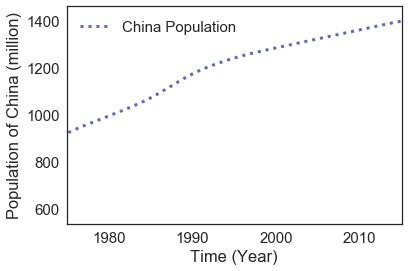

In [6]:
newfig()
plot_estimates(table)

Saving figure to file model.png


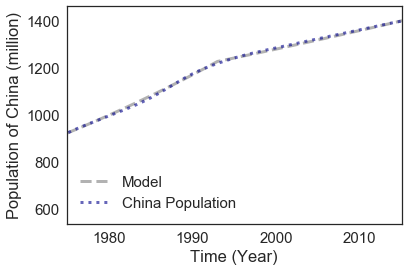

In [12]:
def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t < 1993:
        net_growth = system.alpha1 * pop
    else:
        net_growth = system.alpha2 * pop
    return pop + net_growth

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results
    
system = System(t0=1975,
                t_end=2015,
                p0=china[1975 - 1950] / 1000,
                alpha1=0.016,
               alpha2=0.006)

run_simulation(system, update_func)
newfig()
plot(system.results, '--', color='gray', label='Model')
plot_estimates(table)
savefig('model.png', dpi=300, bbox_inches='tight')